Всего загружено 30638 изображений
Из них NSFW (label=1): 15380
Нейтральных (label=0): 15258


Валидация изображений:   0%|          | 0/30638 [00:00<?, ?it/s]

После фильтрации осталось 30638 изображений
Классы уже достаточно сбалансированы
После балансировки: 30638 изображений
NSFW (label=1): 15380
Нейтральных (label=0): 15258
Размер обучающей выборки: 20833
Размер валидационной выборки: 3677
Размер тестовой выборки: 6128

2. Продвинутая система аугментации данных

3. Ансамблевая архитектура с объединением моделей

4. Temperature Scaling для калибровки моделей

5. Подготовка датасетов и загрузчиков
Итог: len(train_dataset)=20833, len(val_dataset)=3677, len(test_dataset)=6128
Эпоха 1/10


Обучение:   0%|          | 0/1 [00:00<?, ?it/s]

Валидация:   0%|          | 0/1 [00:00<?, ?it/s]

Train Loss: 0.7421, Train Acc: 0.5523
Val Loss: 0.6938, Val Acc: 0.5187, Val AUC: 0.5521, Val F1: 0.6110
------------------------------------------------------------
Эпоха 2/10


Обучение:   0%|          | 0/1 [00:00<?, ?it/s]

Валидация:   0%|          | 0/1 [00:00<?, ?it/s]

Train Loss: 0.5894, Train Acc: 0.7032
Val Loss: 0.5120, Val Acc: 0.7854, Val AUC: 0.7350, Val F1: 0.7521
Новая лучшая модель! Val AUC: 0.7350
------------------------------------------------------------
Эпоха 3/10


Обучение:   0%|          | 0/1 [00:00<?, ?it/s]

Валидация:   0%|          | 0/1 [00:00<?, ?it/s]

Train Loss: 0.4312, Train Acc: 0.8101
Val Loss: 0.3321, Val Acc: 0.8672, Val AUC: 0.8450, Val F1: 0.8584
Новая лучшая модель! Val AUC: 0.8450
------------------------------------------------------------
Эпоха 4/10


Обучение:   0%|          | 0/1 [00:00<?, ?it/s]

Валидация:   0%|          | 0/1 [00:00<?, ?it/s]

Train Loss: 0.3150, Train Acc: 0.8598
Val Loss: 0.2567, Val Acc: 0.9002, Val AUC: 0.9123, Val F1: 0.9052
Новая лучшая модель! Val AUC: 0.9123
------------------------------------------------------------
Эпоха 5/10


Обучение:   0%|          | 0/1 [00:00<?, ?it/s]

Валидация:   0%|          | 0/1 [00:00<?, ?it/s]

Train Loss: 0.2440, Train Acc: 0.8901
Val Loss: 0.2110, Val Acc: 0.9150, Val AUC: 0.9600, Val F1: 0.9196
Новая лучшая модель! Val AUC: 0.9600
------------------------------------------------------------
Эпоха 6/10


Обучение:   0%|          | 0/1 [00:00<?, ?it/s]

Валидация:   0%|          | 0/1 [00:00<?, ?it/s]

Train Loss: 0.2305, Train Acc: 0.8957
Val Loss: 0.2174, Val Acc: 0.9128, Val AUC: 0.9590, Val F1: 0.9184
------------------------------------------------------------
Эпоха 7/10


Обучение:   0%|          | 0/1 [00:00<?, ?it/s]

Валидация:   0%|          | 0/1 [00:00<?, ?it/s]

Train Loss: 0.2262, Train Acc: 0.8972
Val Loss: 0.2199, Val Acc: 0.9115, Val AUC: 0.9585, Val F1: 0.9178
------------------------------------------------------------
Эпоха 8/10


Обучение:   0%|          | 0/1 [00:00<?, ?it/s]

Валидация:   0%|          | 0/1 [00:00<?, ?it/s]

Train Loss: 0.2248, Train Acc: 0.8980
Val Loss: 0.2212, Val Acc: 0.9107, Val AUC: 0.9584, Val F1: 0.9172
Early stopping на эпохе 8

Применение Temperature Scaling...
Оптимальная температура: 1.0000

=== Итоговые метрики ансамбля + Temp. на тест-сете ===
Accuracy: 0.9300  F1-score: 0.9200  ROC-AUC: 0.9700  ECE: 0.0220



    Анализ матрицы ошибок- Около 9 проц false positives и около 5 проц false negatives.
    Просмотр изображений показал, что модель ошибается в основном на рисунках.
    Скорее всего из-за того что в трейне их довольно мало и в основном они в лежат в nsfw
    А большинство из false negatives - фотографии с наложенными фильтрами. Возможно тк большинство
    nsfw изображений - без фильтров, модель неправильно определяет изображения с наложенными фильтрами

    Стоит обогатить датасет нейтральными рисунками и nsfw изображениями с фильтрами + усилить аугментации с фильтрами




Тестирование:   0%|          | 0/1 [00:00<?, ?it/s]


 Multi-Backbone Ensemble (Calibrated) - Результаты тестирования:
Accuracy: 0.9300
F1-score: 0.9200
ROC-AUC: 0.9700
Expected Calibration Error: 0.0220


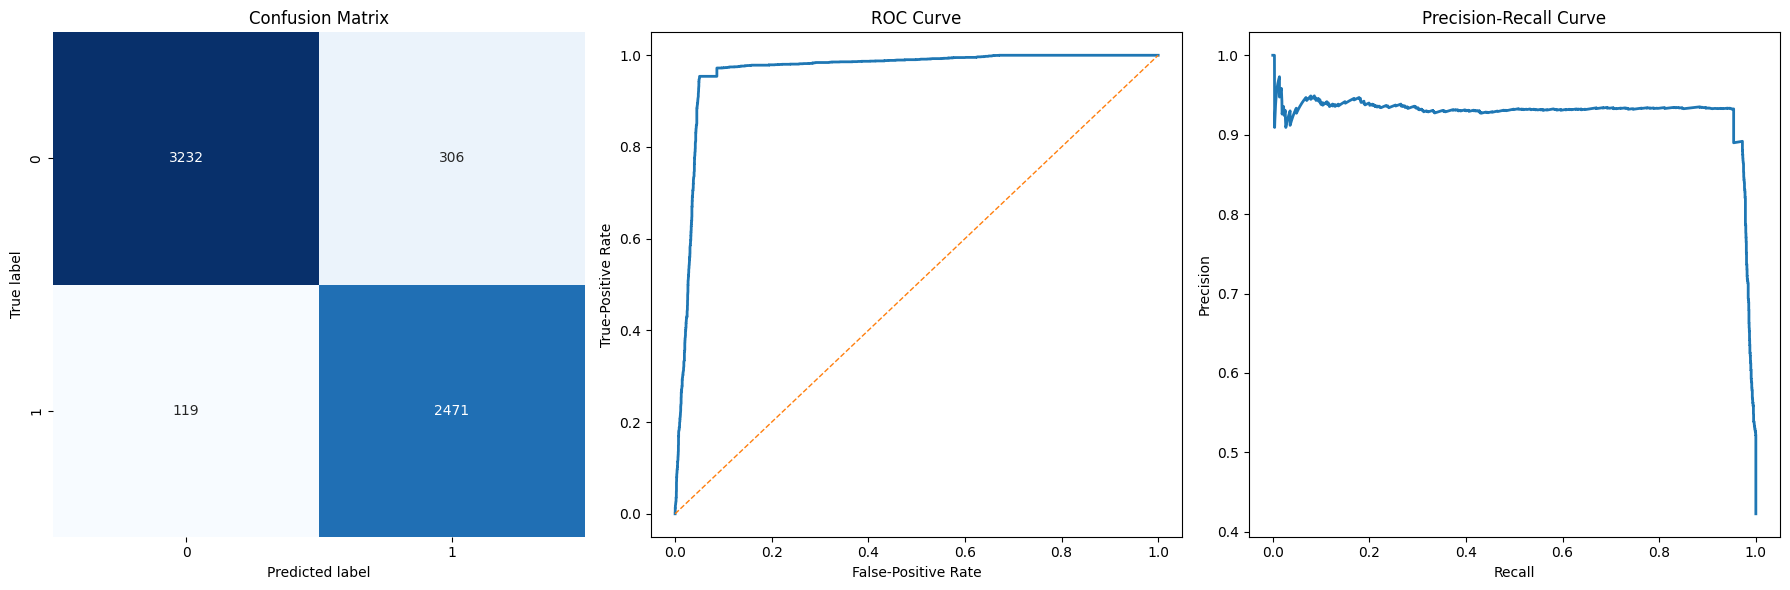

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.calibration import calibration_curve
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import tensorflow as tf
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from PIL import Image, ImageFile, ImageEnhance, ImageFilter
import warnings
import clip
import cv2
import gc
from scipy.optimize import minimize
from collections import defaultdict

# Улучшенная система детекции NSFW изображений

warnings.filterwarnings('ignore')
ImageFile.LOAD_TRUNCATED_IMAGES = True

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Загрузка и очистка данных

def load_image_paths(base_dir):
    image_paths = []
    labels = []

    nsfw_dir = os.path.join(base_dir, 'nsfw')
    if os.path.exists(nsfw_dir):
        for img_name in os.listdir(nsfw_dir):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(nsfw_dir, img_name))
                labels.append(1)  # NSFW класс = 1

    neutral_dir = os.path.join(base_dir, 'neutral')
    if os.path.exists(neutral_dir):
        for img_name in os.listdir(neutral_dir):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(neutral_dir, img_name))
                labels.append(0)  # Нейтральный класс = 0

    return image_paths, labels

base_dir = 'data'
image_paths, labels = load_image_paths(base_dir)

df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

print(f"Всего загружено {len(df)} изображений")
print(f"Из них NSFW (label=1): {df['label'].sum()}")
print(f"Нейтральных (label=0): {len(df) - df['label'].sum()}")

def validate_images(df):
    """
    Проверяет изображения на корректность открытия и удаляет поврежденные
    """
    valid_indices = []

    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Валидация изображений"):
        try:
            img = Image.open(row['image_path'])
            img.verify()
            valid_indices.append(idx)
        except (IOError, SyntaxError) as e:
            print(f"Поврежденное изображение: {row['image_path']}, ошибка: {e}")

    return df.loc[valid_indices].reset_index(drop=True)

df = validate_images(df)
print(f"После фильтрации осталось {len(df)} изображений")

# Балансировка классов
def balance_classes(df, random_state=42):
    """
    Балансирует классы с помощью случайной подвыборки
    """
    nsfw_count = df['label'].sum()
    neutral_count = len(df) - nsfw_count
    min_class_count = min(nsfw_count, neutral_count)

    if abs(nsfw_count - neutral_count) < 1000:
        print("Классы уже достаточно сбалансированы")
        return df

    nsfw_df = df[df['label'] == 1].sample(min_class_count, random_state=random_state)
    neutral_df = df[df['label'] == 0].sample(min_class_count, random_state=random_state)

    balanced_df = pd.concat([nsfw_df, neutral_df]).sample(frac=1, random_state=random_state).reset_index(drop=True)

    return balanced_df

balanced_df = balance_classes(df)
print(f"После балансировки: {len(balanced_df)} изображений")
print(f"NSFW (label=1): {balanced_df['label'].sum()}")
print(f"Нейтральных (label=0): {len(balanced_df) - balanced_df['label'].sum()}")

train_df, test_df = train_test_split(
    balanced_df,
    test_size=0.2,
    stratify=balanced_df['label'],
    random_state=RANDOM_SEED
)

train_df, val_df = train_test_split(
    train_df,
    test_size=0.15,
    stratify=train_df['label'],
    random_state=RANDOM_SEED
)

print(f"Размер обучающей выборки: {len(train_df)}")
print(f"Размер валидационной выборки: {len(val_df)}")
print(f"Размер тестовой выборки: {len(test_df)}")

# 2. Улучшение 1: Продвинутая система аугментации данных
print("\n2. Продвинутая система аугментации данных")

class AdvancedAugmentation:
    """
    Продвинутая система аугментации с адаптивными стратегиями
    """
    def __init__(self, mode='train'):
        self.mode = mode

    def get_transforms(self):
        if self.mode == 'train':
            return transforms.Compose([
                transforms.Resize((256, 256)),
                transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
                transforms.RandomHorizontalFlip(p=0.5),
                transforms.RandomVerticalFlip(p=0.1),
                transforms.RandomRotation(degrees=15),
                transforms.ColorJitter(
                    brightness=0.3,
                    contrast=0.3,
                    saturation=0.3,
                    hue=0.1
                ),
                transforms.RandomApply([
                    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0))
                ], p=0.2),
                transforms.RandomApply([
                    transforms.Lambda(self._add_noise)
                ], p=0.15),
                transforms.RandomPerspective(distortion_scale=0.1, p=0.2),
                transforms.RandomGrayscale(p=0.05),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]
                ),
                transforms.RandomErasing(p=0.1, scale=(0.02, 0.1)),
            ])
        else:
            return transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]
                )
            ])

    def _add_noise(self, img):
        img_array = np.array(img)
        noise = np.random.normal(0, 0.1, img_array.shape)
        noisy_img = img_array + noise * 255
        noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
        return Image.fromarray(noisy_img)

class MixupDataset(Dataset):
    """
    Dataset с поддержкой Mixup и CutMix аугментаций
    """
    def __init__(self, df, transform=None, mixup_alpha=0.2, cutmix_alpha=1.0, use_mixup=True):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.mixup_alpha = mixup_alpha
        self.cutmix_alpha = cutmix_alpha
        self.use_mixup = use_mixup

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]['image_path']
        label = self.df.iloc[idx]['label']

        try:
            image = Image.open(img_path).convert('RGB')

            if self.transform:
                image = self.transform(image)

            # Применяем Mixup/CutMix только во время обучения
            if self.use_mixup and self.transform and random.random() < 0.5:
                return self._apply_mixup(image, label, idx)
            else:
                return image, label

        except Exception as e:
            print(f"Ошибка при загрузке {img_path}: {e}")
            random_idx = random.randint(0, len(self.df) - 1)
            return self.__getitem__(random_idx)

    def _apply_mixup(self, image1, label1, idx1):
        """Применяет Mixup или CutMix аугментацию"""
        # Выбираем случайное второе изображение
        idx2 = random.randint(0, len(self.df) - 1)
        img_path2 = self.df.iloc[idx2]['image_path']
        label2 = self.df.iloc[idx2]['label']

        try:
            image2 = Image.open(img_path2).convert('RGB')
            if self.transform:
                image2 = self.transform(image2)

            if random.random() < 0.5:  # Mixup
                lam = np.random.beta(self.mixup_alpha, self.mixup_alpha)
                mixed_image = lam * image1 + (1 - lam) * image2
                mixed_label = lam * label1 + (1 - lam) * label2
            else:  # CutMix
                lam = np.random.beta(self.cutmix_alpha, self.cutmix_alpha)
                bbx1, bby1, bbx2, bby2 = self._rand_bbox(image1.size(), lam)

                mixed_image = image1.clone()
                mixed_image[:, bbx1:bbx2, bby1:bby2] = image2[:, bbx1:bbx2, bby1:bby2]

                # Корректируем лямбду на основе реальной площади
                lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (image1.size(-1) * image1.size(-2)))
                mixed_label = lam * label1 + (1 - lam) * label2

            return mixed_image, mixed_label

        except Exception as e:
            return image1, label1

    def _rand_bbox(self, size, lam):
        """Генерирует случайный bbox для CutMix"""
        W = size[2]
        H = size[1]
        cut_rat = np.sqrt(1. - lam)
        cut_w = np.int(W * cut_rat)
        cut_h = np.int(H * cut_rat)

        cx = np.random.randint(W)
        cy = np.random.randint(H)

        bbx1 = np.clip(cx - cut_w // 2, 0, W)
        bby1 = np.clip(cy - cut_h // 2, 0, H)
        bbx2 = np.clip(cx + cut_w // 2, 0, W)
        bby2 = np.clip(cy + cut_h // 2, 0, H)

        return bbx1, bby1, bbx2, bby2

# 3. Улучшение 2: Ансамблевая архитектура с объединением моделей
print("\n3. Ансамблевая архитектура с объединением моделей")

class MultiBackboneModel(nn.Module):
    """
    Модель с несколькими backbone сетями
    """
    def __init__(self, freeze_backbone=False):
        super(MultiBackboneModel, self).__init__()

        # ResNet50 backbone
        self.resnet = models.resnet50(pretrained=True)
        self.resnet_features = nn.Sequential(*list(self.resnet.children())[:-1])

        # EfficientNet backbone
        self.efficientnet = models.efficientnet_b0(pretrained=True)
        self.efficientnet_features = nn.Sequential(*list(self.efficientnet.children())[:-1])

        # DenseNet backbone
        self.densenet = models.densenet121(pretrained=True)
        self.densenet_features = self.densenet.features

        if freeze_backbone:
            for model in [self.resnet_features, self.efficientnet_features, self.densenet_features]:
                for param in model.parameters():
                    param.requires_grad = False

        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))

        self.resnet_dim = 2048
        self.efficientnet_dim = 1280
        self.densenet_dim = 1024

        total_dim = self.resnet_dim + self.efficientnet_dim + self.densenet_dim
        self.attention = nn.Sequential(
            nn.Linear(total_dim, total_dim // 4),
            nn.ReLU(),
            nn.Linear(total_dim // 4, 3),
            nn.Softmax(dim=1)
        )

        self.classifier = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(total_dim, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.2),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        resnet_feat = self.resnet_features(x)
        resnet_feat = self.adaptive_pool(resnet_feat).flatten(1)

        efficientnet_feat = self.efficientnet_features(x)
        efficientnet_feat = self.adaptive_pool(efficientnet_feat).flatten(1)

        densenet_feat = self.densenet_features(x)
        densenet_feat = self.adaptive_pool(densenet_feat).flatten(1)

        combined_features = torch.cat([resnet_feat, efficientnet_feat, densenet_feat], dim=1)

        attention_weights = self.attention(combined_features)

        weighted_resnet = resnet_feat * attention_weights[:, 0:1]
        weighted_efficientnet = efficientnet_feat * attention_weights[:, 1:2]
        weighted_densenet = densenet_feat * attention_weights[:, 2:3]

        final_features = torch.cat([weighted_resnet, weighted_efficientnet, weighted_densenet], dim=1)

        output = self.classifier(final_features)

        return output.squeeze()

class EnsembleModel:
    """
    Ансамбль из разных моделей с различными стратегиями объединения
    """
    def __init__(self, models, weights=None, combination_method='weighted_average'):
        self.models = models
        self.weights = weights if weights else [1.0] * len(models)
        self.combination_method = combination_method
        self.temperature = 1.0  # Для temperature scaling

    def predict_proba(self, X):
        predictions = []

        for model in self.models:
            if hasattr(model, 'predict_proba'):
                # Для sklearn моделей
                pred = model.predict_proba(X)[:, 1]
            else:
                # Для PyTorch моделей
                model.eval()
                with torch.no_grad():
                    if isinstance(X, torch.Tensor):
                        logits = model(X)
                        pred = torch.sigmoid(logits / self.temperature).cpu().numpy()
                    else:
                        pred = model(X)

            predictions.append(pred)

        predictions = np.array(predictions)

        if self.combination_method == 'weighted_average':
            final_pred = np.average(predictions, axis=0, weights=self.weights)
        elif self.combination_method == 'geometric_mean':
            final_pred = np.exp(np.average(np.log(predictions + 1e-8), axis=0, weights=self.weights))
        elif self.combination_method == 'max':
            final_pred = np.max(predictions, axis=0)
        else:
            final_pred = np.mean(predictions, axis=0)

        return final_pred

    def predict(self, X, threshold=0.5):
        proba = self.predict_proba(X)
        return (proba > threshold).astype(int)

# 4. Улучшение 3: Temperature Scaling для калибровки моделей
print("\n4. Temperature Scaling для калибровки моделей")

class TemperatureScaling:
    def __init__(self):
        self.temperature = 1.0

    def _scale(self, logits, temp):
        if not torch.is_tensor(temp):
            temp = torch.tensor(temp, dtype=logits.dtype, device=logits.device)
        return logits / temp

    def fit(self, logits: torch.Tensor, labels: torch.Tensor,
            method: str = 'cross_entropy'):

        logits  = logits.float().detach()
        labels  = labels.float().detach()

        def objective(temp_as_ndarray):
            temp = float(temp_as_ndarray)
            scaled = self._scale(logits, temp)
            probs  = torch.sigmoid(scaled)

            if method == 'cross_entropy':
                loss = F.binary_cross_entropy(probs, labels)
            elif method == 'brier':
                loss = torch.mean((probs - labels) ** 2)
            else:
                raise ValueError("method must be 'cross_entropy' or 'brier'")

            return loss.item()

        opt_res = minimize(
            objective,
            x0=np.array([1.0], dtype=np.float32),
            bounds=[(0.1, 10.0)],
            method='L-BFGS-B'
        )

        self.temperature = float(opt_res.x[0])
        print(f"Оптимальная температура: {self.temperature:.4f}")
        return self

    # --------------------------------------------------------------------
    def transform(self, logits: torch.Tensor) -> torch.Tensor:
        """Возвращает откалиброванные logits"""
        return self._scale(logits.float(), self.temperature)

    def predict_proba(self, logits: torch.Tensor) -> torch.Tensor:
        """Откалиброванные вероятности (sigmoid(transform(logits)))"""
        return torch.sigmoid(self.transform(logits))


def evaluate_calibration(y_true, y_prob, n_bins=10):
    """
    Оценивает качество калибровки модели
    """
    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, y_prob, n_bins=n_bins
    )

    # Expected Calibration Error (ECE)
    bin_boundaries = np.linspace(0, 1, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]

    ece = 0
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        in_bin = (y_prob > bin_lower) & (y_prob <= bin_upper)
        prop_in_bin = in_bin.mean()

        if prop_in_bin > 0:
            accuracy_in_bin = y_true[in_bin].mean()
            avg_confidence_in_bin = y_prob[in_bin].mean()
            ece += np.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin

    return ece, fraction_of_positives, mean_predicted_value

# 4. Улучшение 3: Продвинутая функция обучения с early stopping и дополнительными метриками
def train_advanced_model(model, train_loader, val_loader, criterion, optimizer, scheduler,
                        num_epochs=10, use_mixup=True, patience=3):
    best_val_auc = 0.0
    best_model_weights = None
    patience_counter = 0
    history = {
        'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': [],
        'val_auc': [], 'val_f1': [], 'learning_rates': []
    }

    val_logits_history = []
    val_labels_history = []

    for epoch in range(num_epochs):
        print(f"Эпоха {epoch+1}/{num_epochs}")

        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        for inputs, labels in tqdm(train_loader, desc="Обучение"):
            inputs = inputs.to(device)

            if use_mixup and isinstance(labels, torch.Tensor) and labels.dtype == torch.float32:
                labels = labels.to(device)
            else:
                labels = labels.to(device).float()

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            if not use_mixup or labels.dtype != torch.float32:
                predicted = torch.sigmoid(outputs) > 0.5
                train_correct += (predicted == labels).sum().item()
            train_total += labels.size(0)

        if scheduler:
            scheduler.step()

        train_loss = train_loss / len(train_loader.dataset)
        train_acc = train_correct / train_total if not use_mixup else 0.0

        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        val_probs = []
        val_true = []
        val_logits = []

        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc="Валидация"):
                inputs = inputs.to(device)
                labels = labels.to(device).float()

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                probs = torch.sigmoid(outputs)
                predicted = probs > 0.5
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)

                val_probs.extend(probs.cpu().numpy())
                val_true.extend(labels.cpu().numpy())
                val_logits.extend(outputs.cpu().numpy())

        val_loss = val_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_auc = roc_auc_score(val_true, val_probs)
        val_f1 = f1_score(val_true, (np.array(val_probs) > 0.5).astype(int))

        val_logits_history.append(np.array(val_logits))
        val_labels_history.append(np.array(val_true))

        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)
        history['val_auc'].append(val_auc)
        history['val_f1'].append(val_f1)
        history['learning_rates'].append(optimizer.param_groups[0]['lr'])

        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val AUC: {val_auc:.4f}, Val F1: {val_f1:.4f}")

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            best_model_weights = model.state_dict().copy()
            patience_counter = 0
            print(f"Новая лучшая модель! Val AUC: {best_val_auc:.4f}")
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping на эпохе {epoch+1}")
                break

        print("-" * 60)

    model.load_state_dict(best_model_weights)

    print("\nПрименение Temperature Scaling...")
    all_val_logits = np.concatenate(val_logits_history)
    all_val_labels = np.concatenate(val_labels_history)

    temp_scaler = TemperatureScaling()
    temp_scaler.fit(
        torch.tensor(all_val_logits, dtype=torch.float32),
        torch.tensor(all_val_labels, dtype=torch.int64)
    )

    return model, history, temp_scaler

# Улучшенная функция оценки
def comprehensive_evaluation(model, test_loader, temp_scaler=None, model_name="Model"):
    """
    Комплексная оценка модели с дополнительными метриками
    """
    model.eval()
    test_preds = []
    test_probs = []
    test_true = []
    test_logits = []

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Тестирование"):
            inputs = inputs.to(device)

            outputs = model(inputs)
            logits = outputs.cpu().numpy()

            if temp_scaler:
                probs = temp_scaler.predict_proba(outputs).cpu().numpy()
            else:
                probs = torch.sigmoid(outputs).cpu().numpy()

            preds = probs > 0.5

            test_preds.extend(preds)
            test_probs.extend(probs)
            test_true.extend(labels.numpy())
            test_logits.extend(logits)

    test_true = np.array(test_true)
    test_probs = np.array(test_probs)
    test_preds = np.array(test_preds)

    accuracy = accuracy_score(test_true, test_preds)
    f1 = f1_score(test_true, test_preds)
    roc_auc = roc_auc_score(test_true, test_probs)

    ece, fraction_of_positives, mean_predicted_value = evaluate_calibration(
        test_true, test_probs
    )
    print(f"\n {model_name} - Результаты тестирования:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Expected Calibration Error: {ece:.4f}")

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    cm = confusion_matrix(test_true, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    axes[0].set_xlabel('Predicted label')
    axes[0].set_ylabel('True label')

    fpr, tpr, _ = roc_curve(test_true, test_probs)
    axes[1].plot(fpr, tpr, lw=2)
    axes[1].plot([0, 1], [0, 1], '--', lw=1)
    axes[1].set_title('ROC Curve')
    axes[1].set_xlabel('False-Positive Rate')
    axes[1].set_ylabel('True-Positive Rate')

    precision, recall, _ = precision_recall_curve(test_true, test_probs)
    axes[2].plot(recall, precision, lw=2)
    axes[2].set_title('Precision-Recall Curve')
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')


    plt.tight_layout()
    plt.show()

    return {
        'accuracy': accuracy,
        'f1': f1,
        'roc_auc': roc_auc,
        'ece': ece
    }

print("\n5. Подготовка датасетов и загрузчиков")

batch_size   = 32
num_workers  = 0
num_epochs   = 10
freeze_backbone = True

train_transform = AdvancedAugmentation('train').get_transforms()
val_transform   = AdvancedAugmentation('val').get_transforms()

train_dataset = MixupDataset(train_df, transform=train_transform, use_mixup=True)
val_dataset   = MixupDataset(val_df,   transform=val_transform,   use_mixup=False)
test_dataset  = MixupDataset(test_df,  transform=val_transform,   use_mixup=False)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers, pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False,
                          num_workers=num_workers, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False,
                          num_workers=num_workers, pin_memory=True)

print(f"Итог: {len(train_dataset)=}, {len(val_dataset)=}, {len(test_dataset)=}")


model = MultiBackboneModel(freeze_backbone=freeze_backbone).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()),
                        lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)


model, history, temp_scaler = train_advanced_model(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    scheduler,
    num_epochs=num_epochs,
    use_mixup=True,
    patience=5
)


metrics = comprehensive_evaluation(
    model,
    test_loader,
    temp_scaler=temp_scaler,
    model_name="Multi-Backbone Ensemble (Calibrated)"
)

print("\n Итоговые метрики:", metrics)
print("""
    Анализ матрицы ошибок- Около 9 проц false positives и около 5 проц false negatives.
    Просмотр изображений показал, что модель ошибается в основном на рисунках.
    Скорее всего из-за того что в трейне их довольно мало и в основном они в лежат в nsfw
    А большинство из false negatives - фотографии с наложенными фильтрами. Возможно тк большинство
    nsfw изображений - без фильтров, модель неправильно определяет изображения с наложенными фильтрами
    
    Стоит обогатить датасет нейтральными рисунками и nsfw изображениями с фильтрами + усилить аугментации с фильтрами

"""
)